In [54]:
import tensorflow as tf 
#from tensorflow.keras import datasets, layers, model 
import matplotlib.pyplot as plt 
import numpy as np 
import statistics 
import math 
import pandas as pd

import seaborn as sb
#import pandas as pd
#import matplotlib.pyplot as plt

In [69]:
def brownian_bridge_distribution_f(s,t,y,n): 
    mu, sigma = 0.5, 0.1
    r_v = np.random.normal(0, 1, n)
    ret_v = (s/t)*y + math.sqrt((t-s)*s/t )*r_v

    return statistics.mean(ret_v)

def brownian_bridge_path_f(s,t,y,n=30): 
    get_path_v = np.zeros(t-s+1)
    
    for i in range(s,t+1): 
        get_path_v[i-s] = brownian_bridge_distribution_f(s = i,t =t,y =y,n=n)
        
    return get_path_v

def brownian_bridge_sim_f(s, t, y, n_sims_per_point, num_paths, convert_to_df = True): 
    collect_paths_m = np.zeros(shape = (t+1,num_paths))
    #if s == 0: 
     #   collect_paths_m = np.zeros(shape = (t+1,num_paths))
    col_names = []
    for i in range(0,num_paths): 
        check_v = brownian_bridge_path_f(s=s,t = t,y = y, n= n_sims_per_point)
        collect_paths_m[:,i] = check_v
        temp_name = 'path' + '_' + str(i)
        col_names.append(temp_name)
        
    df = collect_paths_m
    
    if convert_to_df == True: 
        df = pd.DataFrame(collect_paths_m, columns = col_names)
        df['Time'] = range(s,t+1)
    
    return df

#def convert_to_data_frame

In [70]:
brownian_bridge_distribution_f(1,3,0.4,10)

0.375344453573411

In [71]:
brownian_bridge_path_f(s=0,t = 10,y = 0.1,n=30)

array([ 0.        , -0.15012592, -0.23027808, -0.35497267,  0.09053521,
        0.10271764, -0.04484646, -0.14410213, -0.17416054,  0.10482902,
        0.1       ])

In [99]:
brownian_m = brownian_bridge_sim_f(s = 0, t = 30, y = 1.5, n_sims_per_point = 50, num_paths = 30)

In [100]:
brownian_m.head()

,path_0,path_1,path_2,path_3,path_4,path_5,path_6,path_7,path_8,path_9,...,path_21,path_22,path_23,path_24,path_25,path_26,path_27,path_28,path_29,Time
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.105201,-0.056258,0.016153,-0.161950,0.020999,0.015828,0.020132,0.135852,-0.075133,0.012563,...,0.260375,0.086753,-0.026546,0.129622,0.074119,-0.158910,0.075252,-0.300000,0.176635,1
2,0.100097,-0.037670,0.039249,0.600338,-0.049362,-0.043881,0.226974,0.115386,0.339321,0.124195,...,0.176472,-0.020695,0.117904,0.148213,0.178217,-0.191903,-0.036292,0.004919,0.134711,2
3,0.697186,-0.098441,0.313271,0.212871,0.626746,0.498990,0.222146,0.078985,0.082400,0.413509,...,0.264454,0.331267,0.459689,0.099763,0.153137,0.331124,0.155495,0.051898,0.048891,3
4,-0.321707,0.069976,-0.028798,0.334080,0.386287,0.104592,-0.104128,0.176592,0.360027,0.289932,...,0.378235,-0.002769,0.283101,0.382848,0.063549,0.255110,-0.052118,0.005225,0.048935,4


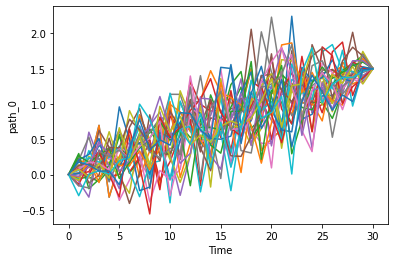

In [101]:
sb.lineplot(x="Time", y="path_0", data=brownian_m)
for c in range(0,len(brownian_m.columns)-1): 
    sb.lineplot(x="Time", y=brownian_m.columns[c], data=brownian_m)